In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
data=pd.read_csv("..\\datasets\\15-Website-performance-analysis\\data-export.csv")

In [52]:
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
Date,,,,,,,,,,
2024-04-16 23:00:00,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
2024-04-17 19:00:00,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2024-04-17 23:00:00,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
2024-04-17 18:00:00,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
2024-04-17 20:00:00,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [30]:
data['Date']=pd.to_datetime(data['Date + hour (YYYYMMDDHH)'],format='%Y%m%d%H')
data.set_index('Date',inplace=True)

In [31]:
data.groupby('Session primary channel group (Default channel group)')['Sessions'].sum().sort_values()

Session primary channel group (Default channel group)
Email                 3
Organic Video       141
Unassigned          559
Referral          30990
Organic Search    33372
Direct            37203
Organic Social    60627
Name: Sessions, dtype: int64

In [32]:
channels=['Organic Social','Direct','Organic Search','Referral']

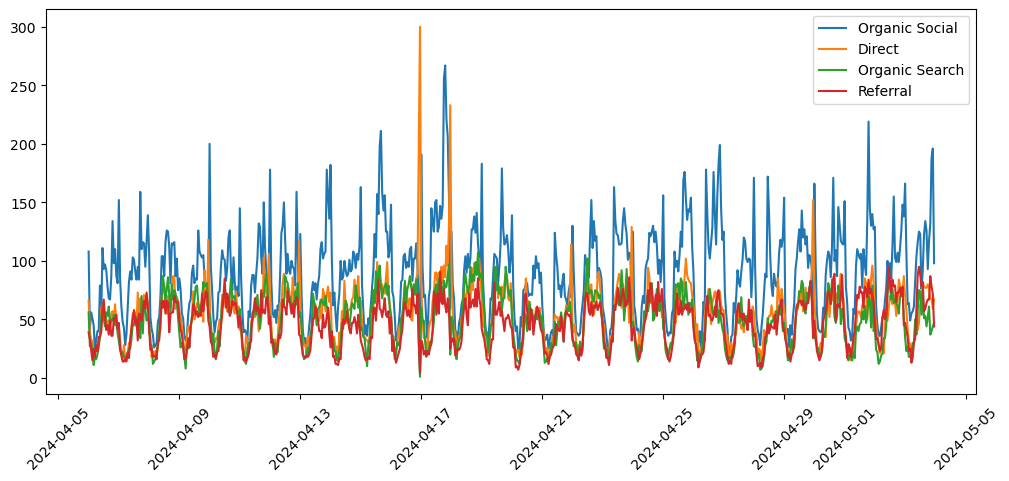

In [53]:
ax=plt.figure(figsize=(12,5))
for channel in channels:
    df=data[data['Session primary channel group (Default channel group)']==channel].resample('h').sum()
    plt.plot(df['Sessions'],label=channel)
plt.xticks(rotation=45)
plt.legend()
plt.show()

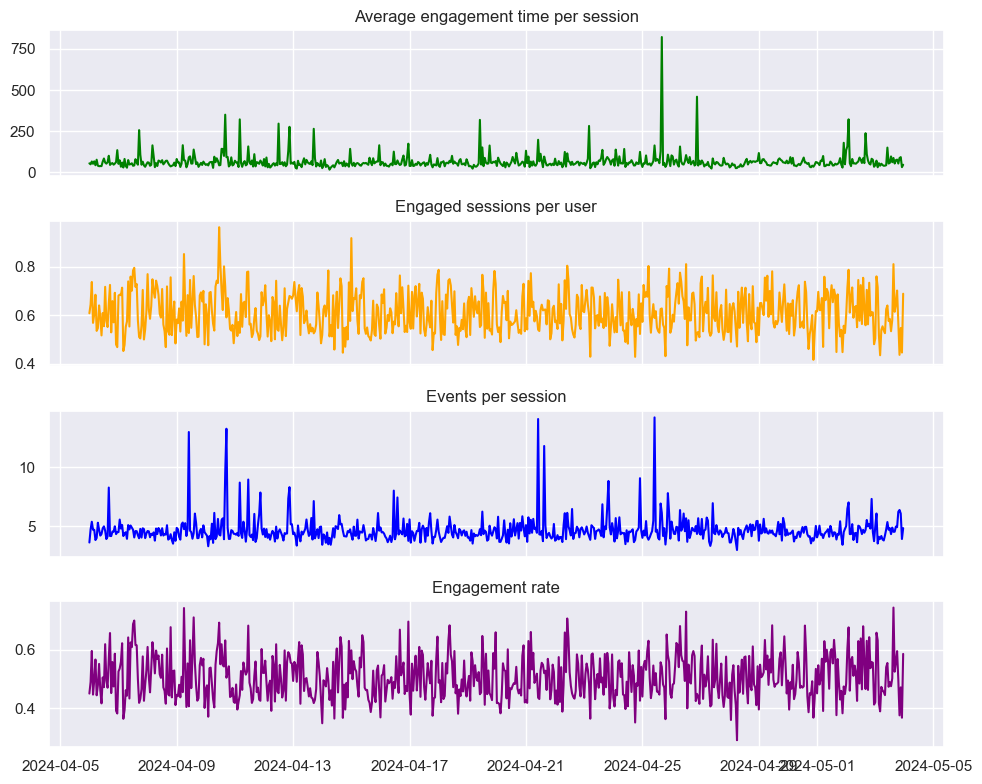

In [98]:
features=['Average engagement time per session','Engaged sessions per user','Events per session','Engagement rate']
colors=['green','orange','blue','purple']
fig,axes=plt.subplots(nrows=4,ncols=1,figsize=(10,8),sharex=True)
for i in range(4):
    df=data[features[i]].resample('h').mean()
    axes[i].plot(df,color=colors[i])
    axes[i].set_title(features[i])
plt.tight_layout()
plt.show()

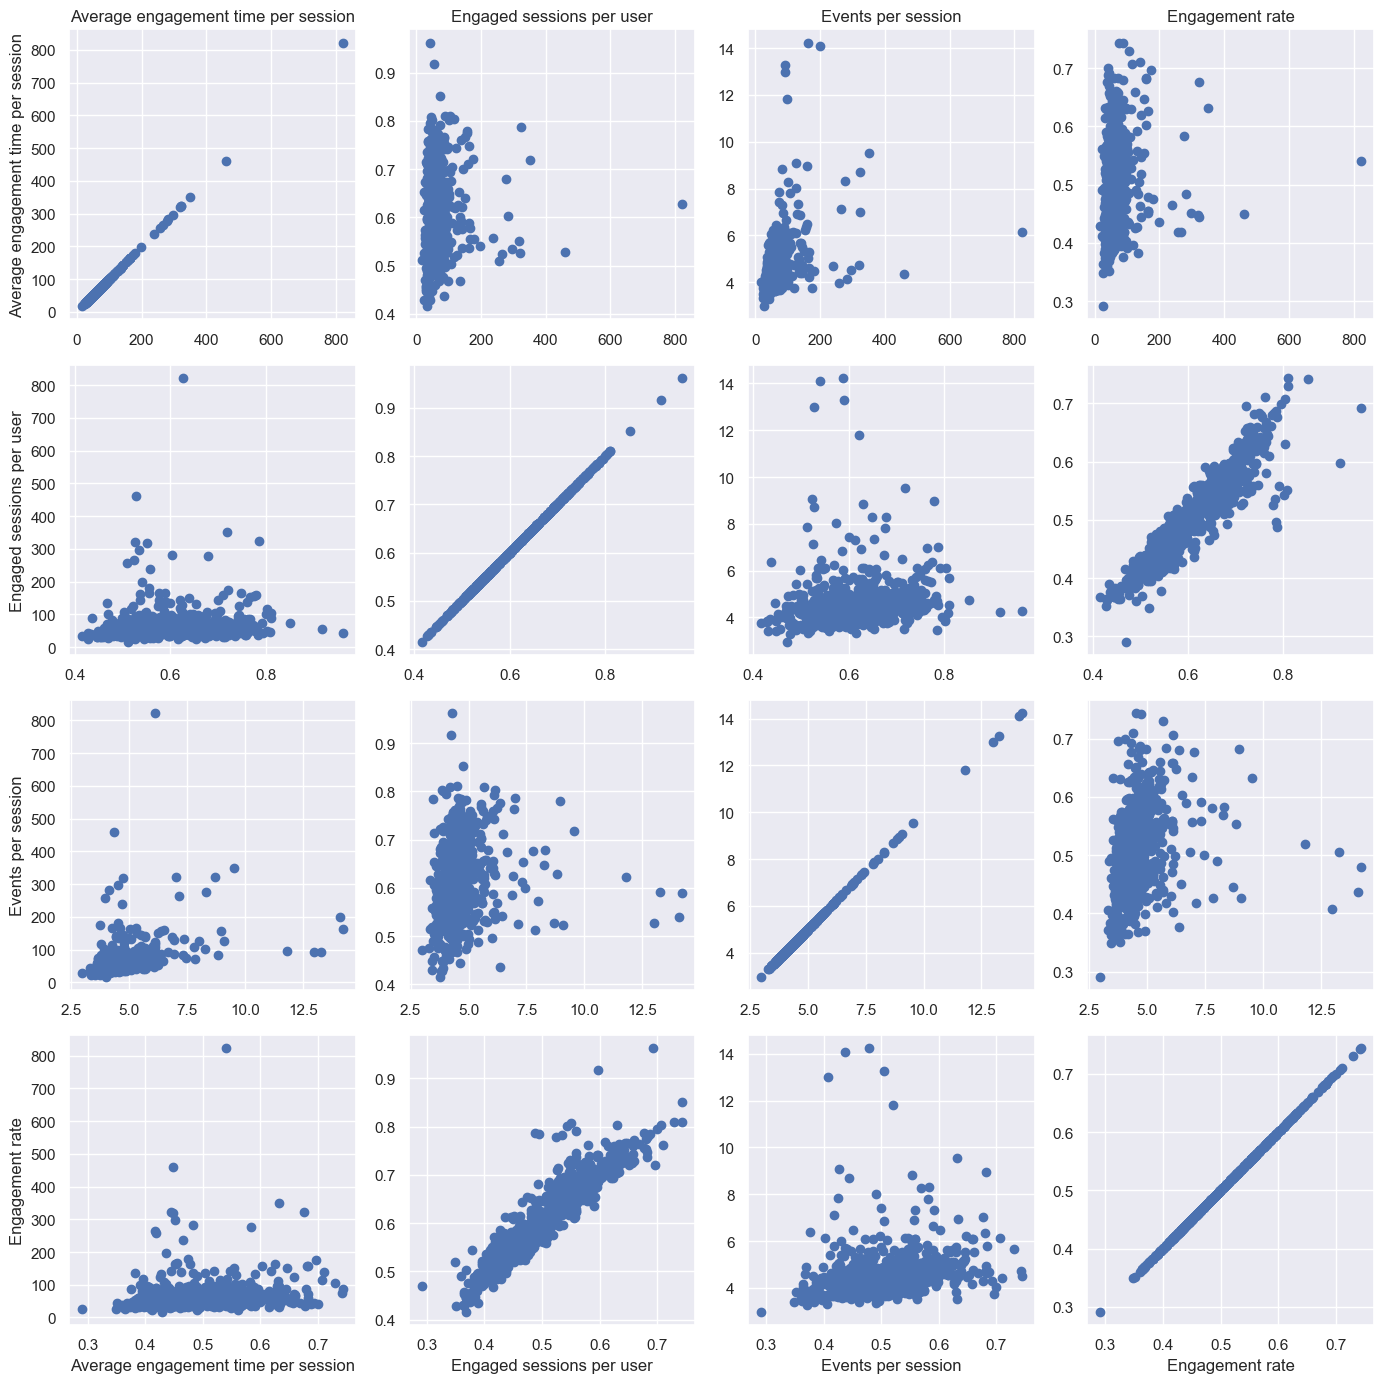

In [108]:
features=['Average engagement time per session','Engaged sessions per user','Events per session','Engagement rate']
fig,axes=plt.subplots(nrows=4,ncols=4,figsize=(14,14))
for i in range(4):
    for j in range(4):
        df1=data[features[i]].resample('h').mean()
        df2=data[features[j]].resample('h').mean()
        axes[i,j].scatter(df1.values,df2.values)
    axes[0,i].set_title(features[i])
    axes[3,i].set_xlabel(features[i])
    axes[i,0].set_ylabel(features[i])

plt.tight_layout()
plt.show()